### Student Information
Name: 許紘齊

Student ID: 11114020

GitHub ID: Damian-Hsu [(api/id: 102812213)](https://api.github.com/users/Damian-Hsu)

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Setup environment

### check environment

In [1]:
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

d:\DataMiningLab\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:21) [MSC v.1916 64 bit (AMD64)]


### Import

In [2]:
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px
import matplotlib.pyplot as plt
import math
import os
import shutil
import seaborn as sns

DATA_DIR = "./.datas"
DATASET_FOLDER_NAME = "datasets"
TARGET_DATASET_NAME = "Reddit-stock-sentiment.csv"
TA_DATASET_PATH = "./newdataset/Reddit-stock-sentiment.csv"
TARGET_DATASET_PATH = os.path.join(DATA_DIR,DATASET_FOLDER_NAME,TARGET_DATASET_NAME)

os.makedirs(DATA_DIR, exist_ok=True)
shutil.copyfile(TA_DATASET_PATH, TARGET_DATASET_PATH)   
RANDOM_SEED = 42

%matplotlib inline

### nlte setup

In [3]:
nltk_download_dir = os.path.join(DATA_DIR,"nltk_data")
os.makedirs(nltk_download_dir, exist_ok=True)

nltk.download("punkt",download_dir = nltk_download_dir)
nltk.download("punkt_tab",download_dir = nltk_download_dir)
nltk.data.path.append(nltk_download_dir) # My usual usage

[nltk_data] Downloading package punkt to ./.datas\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./.datas\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Data Preparation
- create DataFrame

In [4]:
df_Reddit = pd.read_csv(TARGET_DATASET_PATH)
df_Reddit.head(3)

type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   

   subjectivity  polarity  sentiment                               entities  \
0      1.000000 -0.900000       -1.0                                     []   
1      0.177778  0.083333        1.0  ['Stunt', 'company', 'deal', 'place']   
2      0.000000  0.000000        0.0                             ['ticker']   

   label  
0   -1.0  
1    0.0  
2    0.0

In [5]:
# Select sentiment as label
df_Reddit = df_Reddit.drop('label', axis=1)
df_Reddit.columns

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities'],
      dtype='object')

In [6]:
# new order of columns
new_order = ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'entities', 'sentiment']
df_Reddit = df_Reddit[new_order]
df_Reddit.head(3)

type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  downvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN   
1               https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN   
2  https://apnews.com/article/trump-truth-social-...        1        NaN   

   upvote_ratio                                               text  \
0           NaN                                   Calls on retards   
1           NaN  Stunt as in like why did they even make a big ...   
2           NaN                  Seeing lots of red in the ticker.   

   subjectivity  polarity                               entities  sentiment  
0      1.000000 -0.900000                                     []       -1.0  
1      0.177778  0.083333  ['Stunt', 'company', 'deal', 'place']        1.0  
2      0.000000  0.000000                             ['ticker']        0.0

## 

## Basic information of data

In [7]:
print("\n===== Data shape: ===== \n", df_Reddit.shape) 
print("\n===== Data columns: ===== \n", df_Reddit.columns)
print("\n===== Data types: ===== \n", df_Reddit.dtypes)
# 計算數值型資料的基本統計資訊
print("\n===== Data description: ===== \n", df_Reddit.describe())


===== Data shape: ===== 
 (847, 15)

===== Data columns: ===== 
 Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'entities', 'sentiment'],
      dtype='object')

===== Data types: ===== 
 type             object
datetime         object
post_id          object
subreddit        object
title            object
author           object
url              object
upvotes           int64
downvotes       float64
upvote_ratio    float64
text             object
subjectivity    float64
polarity        float64
entities         object
sentiment       float64
dtype: object

===== Data description: ===== 
            upvotes  downvotes  upvote_ratio  subjectivity    polarity  \
count   847.000000  64.000000     64.000000    847.000000  847.000000   
mean     12.262102   0.265625      0.981406      0.346768    0.036116   
std     142.126337   1.461052      0.068147      0.317261    0.297

### 發現問題
- 在 upvotes 中的最小值是 -74，upvotes是記數型資料，應該要從0開始
- 總筆數為 847 ， downvotes 與 upvote_ratio 卻只有 64 筆資料(後續Miss Value Cenversion處理)
### 處理方式
- 將負數資料轉為 0 


In [8]:
df_Reddit['upvotes'] = df_Reddit['upvotes'].clip(lower=0)
df_Reddit['downvotes'] = df_Reddit['downvotes'].clip(lower=0)
df_Reddit.describe()


upvotes  downvotes  upvote_ratio  subjectivity    polarity  \
count   847.000000  64.000000     64.000000    847.000000  847.000000   
mean     12.495868   0.265625      0.981406      0.346768    0.036116   
std     142.076070   1.461052      0.068147      0.317261    0.297814   
min       0.000000   0.000000      0.500000      0.000000   -1.000000   
25%       1.000000   0.000000      1.000000      0.000000    0.000000   
50%       1.000000   0.000000      1.000000      0.366667    0.000000   
75%       4.000000   0.000000      1.000000      0.577500    0.150000   
max    3943.000000  11.000000      1.000000      1.000000    1.000000   

        sentiment  
count  847.000000  
mean     0.144038  
std      0.767566  
min     -1.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      1.000000

## Data Transformation

### Missing Value Cenversion

In [9]:
# check normal missing values
df_Reddit.isnull().sum()

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
entities          0
sentiment         0
dtype: int64

In [10]:
# check hide miss values
_missing_values = ['NaN', 'None', '', ' ', 'na', 'n.a.', 'N.A.', 'nan', 'NAN', 'null', 'NULL', 'Null', '-', '--', '---', '----',[], {}, '[]', '{}']
def check_missing_values_str(x):
    if pd.isna(x) or x in _missing_values:
        return True
    else:
        return False
    
for col in df_Reddit.columns:
    missing_count = df_Reddit[col].apply(check_missing_values_str).sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")
        
# Column 'downvotes' has 783 missing values.
# Column 'upvote_ratio' has 783 missing values.
# Column 'entities' has 53 missing values.

Column 'downvotes' has 783 missing values.
Column 'upvote_ratio' has 783 missing values.
Column 'entities' has 53 missing values.


In [11]:
show = df_Reddit[df_Reddit["downvotes"].notna()]
print(show[["upvotes","downvotes","upvote_ratio"]].info())
print(show[show["upvotes"]/(show["upvotes"]+show["downvotes"])\
            == show["upvote_ratio"]]\
            [["upvotes","downvotes","upvote_ratio"]].info())


#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   upvotes       64 non-null     int64  
#  1   downvotes     64 non-null     float64
#  2   upvote_ratio  64 non-null     float64

#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   upvotes       53 non-null     int64  
#  1   downvotes     53 non-null     float64
#  2   upvote_ratio  53 non-null     float64

# 明顯發現 upvote_ratio 計算有問題，因此需要重新計算upvote_ratio

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, 3 to 844
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   upvotes       64 non-null     int64  
 1   downvotes     64 non-null     float64
 2   upvote_ratio  64 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, 48 to 844
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   upvotes       53 non-null     int64  
 1   downvotes     53 non-null     float64
 2   upvote_ratio  53 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.7 KB
None


In [12]:
def upvote_ratio(row):
    if row["upvotes"] + row["downvotes"] == 0:
        return 0
    elif pd.notna(row["downvotes"]):
        return row["upvotes"]/(row["upvotes"]+row["downvotes"])
    else:
        return np.nan
df_Reddit["upvote_ratio"] = df_Reddit.apply(upvote_ratio, axis=1)
df_Reddit["upvote_ratio"]

0      NaN
1      NaN
2      NaN
3      1.0
4      NaN
      ... 
842    NaN
843    NaN
844    1.0
845    NaN
846    NaN
Name: upvote_ratio, Length: 847, dtype: float64

In [13]:
# 將 entities 欄位的 [] 填補為 np.nan(後面發現不需要)
# df_Reddit['entities'] = df_Reddit['entities'].apply(lambda x: np.nan if check_missing_values_str(x) else x)
# 將 downvotes 與 upvote_ratio 欄位直接刪除，因為這兩個欄位有太多missing values
# 後續可以用T檢定測試相關性，或者做有無欄位的實驗
df_Reddit = df_Reddit.drop(['downvotes','upvote_ratio'], axis=1)
df_Reddit.head(3)

type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio     StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   

                                                 url  upvotes  \
0               https://i.redd.it/0yq2ftren8ue1.jpeg        0   
1               https://i.redd.it/7tl6puv9waue1.jpeg        0   
2  https://apnews.com/article/trump-truth-social-...        1   

                                                text  subjectivity  polarity  \
0                                   Calls on retards      1.000000 -0.900000   
1  Stunt as in like why did they even make a big ...      0.177778  0.083333   
2                  Seeing lots of red in the ticker.      0.000000  0.000000   

                                entities  sentiment  
0                                     []       -1.0  
1  ['Stunt', 'company', 'deal', 'place']        1.0  
2                             ['ticker']        0.0

### Type Conversion

In [14]:
df_Reddit.head(1)

type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   

                                             title        author  \
0  Retardation is on the menu boys! WSB is so back  StickyTip420   

                                    url  upvotes              text  \
0  https://i.redd.it/0yq2ftren8ue1.jpeg        0  Calls on retards   

   subjectivity  polarity entities  sentiment  
0           1.0      -0.9       []       -1.0

In [15]:
df_Reddit.info()
# Data columns (total 13 columns):
#  #   Column        Non-Null Count  Dtype  
# ---  ------        --------------  -----  
#  0   type          847 non-null    object => category
#  1   datetime      847 non-null    object => datetime
#  2   post_id       847 non-null    object 
#  3   subreddit     847 non-null    object => category
#  4   title         847 non-null    object 
#  5   author        847 non-null    object 
#  6   url           847 non-null    object 
#  7   upvotes       847 non-null    int64  
#  8   text          847 non-null    object 
#  9   subjectivity  847 non-null    float64
#  10  polarity      847 non-null    float64
#  11  entities      794 non-null    object => list
#  12  sentiment     847 non-null    float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   text          847 non-null    object 
 9   subjectivity  847 non-null    float64
 10  polarity      847 non-null    float64
 11  entities      847 non-null    object 
 12  sentiment     847 non-null    float64
dtypes: float64(3), int64(1), object(9)
memory usage: 86.1+ KB


In [16]:
# Convert 'datetime' column to datetime type
df_Reddit['datetime'] = pd.to_datetime(df_Reddit['datetime'])
# convert 'entities' column to list type
df_Reddit['entities'] = df_Reddit['entities'].apply(lambda x: eval(x) if pd.notna(x) else x)
# convert 'type' column to category type
df_Reddit['type'] = df_Reddit['type'].astype('category')
# convert 'subreddit' column to category type
df_Reddit['subreddit'] = df_Reddit['subreddit'].astype('category')

df_Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          847 non-null    category      
 1   datetime      847 non-null    datetime64[ns]
 2   post_id       847 non-null    object        
 3   subreddit     847 non-null    category      
 4   title         847 non-null    object        
 5   author        847 non-null    object        
 6   url           847 non-null    object        
 7   upvotes       847 non-null    int64         
 8   text          847 non-null    object        
 9   subjectivity  847 non-null    float64       
 10  polarity      847 non-null    float64       
 11  entities      847 non-null    object        
 12  sentiment     847 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 74.9+ KB


## Dealing with Duplicate Data

In [17]:
check_columns = [ 'datetime', 'post_id', 'title', 'author', 'url','text']
for col in check_columns:
    print(f"Column '{col}' has {df_Reddit[col].duplicated().sum()} duplicated values.")


Column 'datetime' has 5 duplicated values.
Column 'post_id' has 0 duplicated values.
Column 'title' has 720 duplicated values.
Column 'author' has 116 duplicated values.
Column 'url' has 696 duplicated values.
Column 'text' has 23 duplicated values.


In [18]:
# 檢查全資料重複
df_Reddit.duplicated(subset=check_columns).sum()

np.int64(0)

In [19]:
df_Reddit.duplicated(subset=['title','text','author']).sum()

np.int64(23)

In [20]:
# 刪除'title','text'重複的資料
df_Reddit = df_Reddit.drop_duplicates(subset=['title','text','author'])

In [21]:
# 檢查類別比例
categorical_columns = ['type', 'subreddit', 'author']
for col in categorical_columns:
    print(f"Column '{col}' value counts:\n{df_Reddit[col].value_counts()}\n")

Column 'type' value counts:
type
comment    782
post        42
Name: count, dtype: int64

Column 'subreddit' value counts:
subreddit
stocks              273
StockMarket         250
stockstobuytoday    152
wallstreetbets      149
Name: count, dtype: int64

Column 'author' value counts:
author
saasfin                41
[deleted]              13
AutoModerator           9
bullrfuk                5
MutaliskGluon           3
                       ..
le_mihai                1
Ordinary-Office9180     1
lulububudu              1
yes_ur_wrong            1
Odd-Temperature-791     1
Name: count, Length: 731, dtype: int64



In [22]:
# 檢查同標題是否同URL
title_url_counts = df_Reddit.groupby('title')['url'].nunique()
duplicate_title_url = title_url_counts[title_url_counts > 1]
duplicate_title_url.sum()
# 有36個標題對應多個URL，其他的標題都是一對一對應，因此可以刪除URL欄位(與標題相關性太高)

np.int64(4)

In [23]:
# 刪掉URL欄位
df_Reddit = df_Reddit.drop(['url'], axis=1)

In [24]:
df_Reddit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 846
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          824 non-null    category      
 1   datetime      824 non-null    datetime64[ns]
 2   post_id       824 non-null    object        
 3   subreddit     824 non-null    category      
 4   title         824 non-null    object        
 5   author        824 non-null    object        
 6   upvotes       824 non-null    int64         
 7   text          824 non-null    object        
 8   subjectivity  824 non-null    float64       
 9   polarity      824 non-null    float64       
 10  entities      824 non-null    object        
 11  sentiment     824 non-null    float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 72.7+ KB


## Visualize current data

### category column

In [25]:
def _hundreds(num : int) -> int:
    drift = 2 if num % 100 > 80 else 1
    return (num // 100 + drift ) * 100

type
comment    782
post        42
Name: count, dtype: int64


<Axes: title={'center': 'type distribution'}, xlabel='type'>

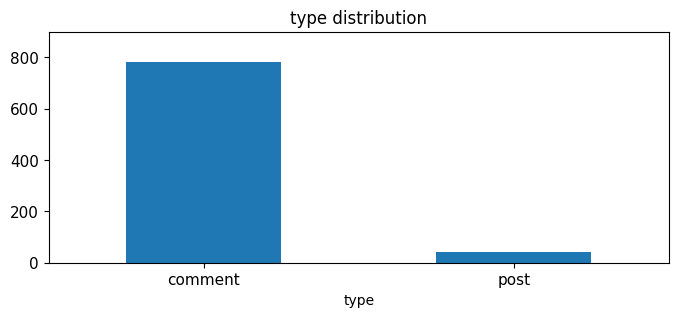

In [26]:
target_column = "type"
print(df_Reddit[target_column].value_counts())

# plot barchart for X
df_Reddit[target_column].value_counts().plot(kind = 'bar',
                                    title=f'{target_column} distribution',
                                    ylim = [0,_hundreds(max(df_Reddit[target_column].value_counts()))],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

subreddit
stocks              273
StockMarket         250
stockstobuytoday    152
wallstreetbets      149
Name: count, dtype: int64


<Axes: title={'center': 'subreddit distribution'}, xlabel='subreddit'>

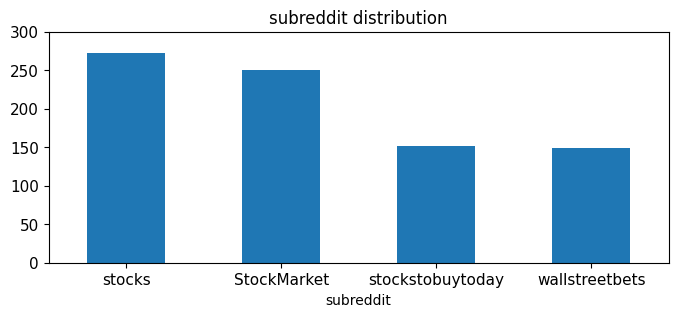

In [27]:
target_column = "subreddit"
print(df_Reddit[target_column].value_counts())

# plot barchart for X
df_Reddit[target_column].value_counts().plot(kind = 'bar',
                                    title=f'{target_column} distribution',
                                    ylim = [0,_hundreds(max(df_Reddit[target_column].value_counts()))],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

subreddit
StockMarket         0.096000
stocks              0.098901
stockstobuytoday    0.256579
wallstreetbets      0.201342
Name: sentiment, dtype: float64


C:\Users\imyud\AppData\Local\Temp\ipykernel_82136\1531230795.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion = df_Reddit.groupby(target_column)['sentiment'].mean()


<Axes: title={'center': 'subreddit vs sentiment mean'}, xlabel='subreddit', ylabel='sentiment mean'>

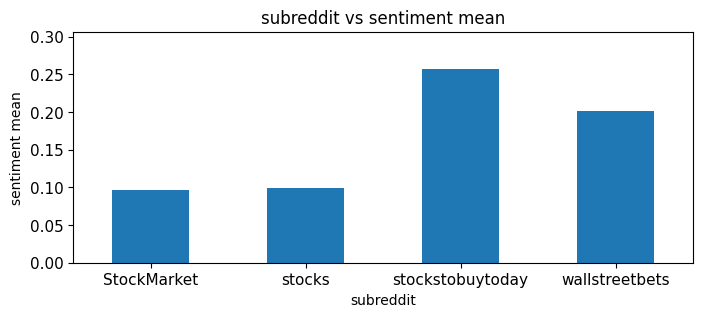

In [28]:
# 視覺化 subreddit 類別對應 sentiment 的平均
target_column = "subreddit"
proportion = df_Reddit.groupby(target_column)['sentiment'].mean()
print(proportion)
proportion.plot(kind = 'bar',
                title=f'{target_column} vs sentiment mean',
                ylim = [0,proportion.max()+0.05],
                ylabel='sentiment mean',        
                rot = 0, fontsize = 11, figsize = (8,3))

C:\Users\imyud\AppData\Local\Temp\ipykernel_82136\2377317311.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportion = df_Reddit.groupby(target_column)['sentiment'].mean()


type
comment    0.132992
post       0.380952
Name: sentiment, dtype: float64


<Axes: title={'center': 'type vs sentiment mean'}, xlabel='type', ylabel='sentiment mean'>

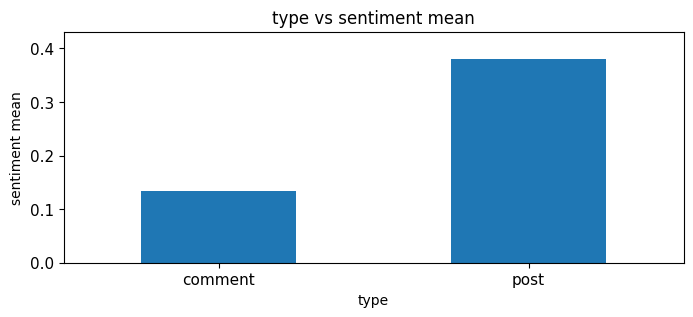

In [29]:
# 視覺化 type 類別對應 sentiment 的平均
target_column = "type"
proportion = df_Reddit.groupby(target_column)['sentiment'].mean()
print(proportion)
proportion.plot(kind = 'bar',
                title=f'{target_column} vs sentiment mean',
                ylim = [0,proportion.max()+0.05],
                ylabel='sentiment mean',        
                rot = 0, fontsize = 11, figsize = (8,3))

## Feature Creation

### NLP

In [30]:
# from helpers 
def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [31]:
df_Reddit["unigrams"] = df_Reddit["text"].apply(lambda x: tokenize_text(x, remove_stopwords=False))
df_Reddit["unigrams"].head(3)

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
Name: unigrams, dtype: object

In [32]:
count_vect = CountVectorizer()
counts_Reddit = count_vect.fit_transform(df_Reddit['text'])
print(counts_Reddit[0])
counts_Reddit.shape

  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


(824, 4346)

In [33]:
counts_Reddit[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

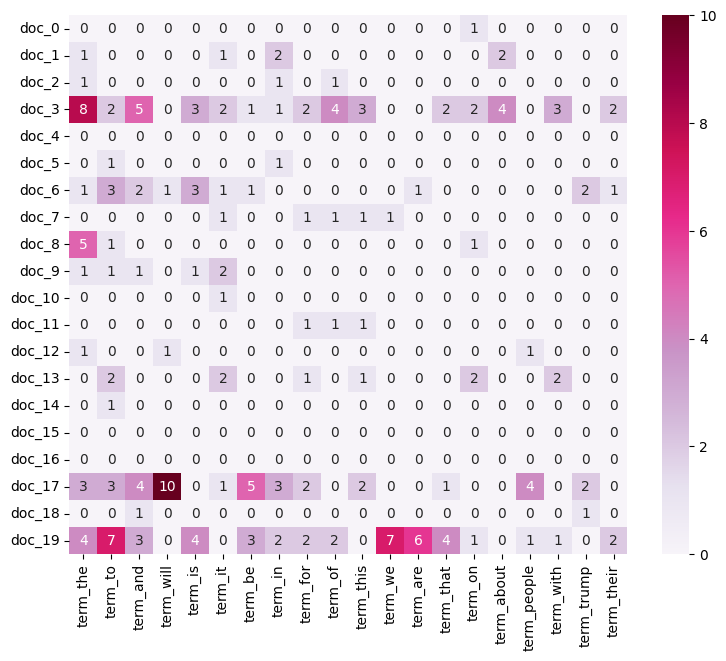

In [34]:
# create a 0:20 vacabulary dictionary
X_sub = counts_Reddit[0:20, :]

# get all feature names
feature_names = count_vect.get_feature_names_out()

# count frequency of each word in the sub-matrix
word_freq = np.asarray(X_sub.sum(axis=0)).squeeze() # can use .ravel() also on here

# create a dataframe for vocabulary and their frequency
vocab_freq_df = pd.DataFrame({
    'term': feature_names,
    'freq': word_freq
},columns=['term','freq'],
index=[i for i in range(len(feature_names))])

# sort by frequency
vocab_freq_df = vocab_freq_df.sort_values(by='freq', ascending=False)
# get top 20 frequent words
top20 = vocab_freq_df.head(20)

# get the term indices
term_indices = [np.where(feature_names == t)[0][0] for t in top20['term']]

# first twenty features only
plot_x = ["term_"+str(i) for i in top20['term'].tolist()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_Reddit.index)[0:20]]
plot_z = X_sub[:, term_indices].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, #vmax=max(plot_z.ravel()), # flatten plot_z to 1D array, and get the max value
                 annot=True)

In [35]:
term_frequencies = np.asarray(counts_Reddit.sum(axis=0))[0]
df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})

fig = px.bar(
    df_plot,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-90,
    width=1400,
    height=600,
    showlegend=False
)

fig.show()

In [36]:
df_plot = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300]
})
df_top50 = df_plot.sort_values(by='frequency', ascending=False).head(50) # get top 50 terms

fig = px.bar(
    df_top50,
    x="term",
    y="frequency",
    title="Word Frequency Distribution (Top 300 Terms)",
    labels={"term": "Term", "frequency": "Count"},
    color="frequency",
    # color_continuous_scale="Viridis"  # "Plasma", "Blues", "Magma"
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=1000,
    height=600,
    showlegend=False
)

fig.show()

In [37]:
count = 1 
for text in df_Reddit[df_Reddit['unigrams'].astype(str).str.contains('4271', regex=False)]["text"]:
    print(f"============ 第{count}筆 ==========\n",text)
    count += 1

============ 第1筆 ==========
 Lmao TSLA is green ![img](emote|t5_2th52|4271)
============ 第2筆 ==========
 Had to get my car fixed.  The shop owner drives a cybertruck and posts about his   love on social media but I've known him forever so I just go there.

I asked him if tariffs would affect him with parts and all

he said "i dont believe there will be tariffs"  ![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)
============ 第3筆 ==========
 what do you expect? it sells toilet papers....margin will shrink more if that industry comes here...![img](emote|t5_2th52|4271)![img](emote|t5_2th52|4271)
============ 第4筆 ==========
 ![img](emote|t5_2th52|4271)
============ 第5筆 ==========
 man i kinda wanna go to a rage room and break a few things to let it all out ![img](emote|t5_2th52|4271)


In [38]:
df_Reddit[df_Reddit['unigrams'].astype(str).str.contains('4271', regex=False)]

type            datetime  post_id       subreddit  \
422  comment 2025-04-11 20:40:00  mmmjtmf  wallstreetbets   
651  comment 2025-04-11 23:44:30  mmng8wh  wallstreetbets   
702  comment 2025-04-12 00:59:44  mmns8pi  wallstreetbets   
714  comment 2025-04-11 17:40:09  mmlk9q7  wallstreetbets   
777  comment 2025-04-12 00:18:06  mmnlp87  wallstreetbets   

                                                 title                author  \
422  Weekend Discussion Thread for the Weekend of A...              chobro17   
651  Weekend Discussion Thread for the Weekend of A...          31andnotdone   
702  Retail giant TARGET has now declined for 10 co...  VariationConstant675   
714    Retardation is on the menu boys! WSB is so back              getapuss   
777  Weekend Discussion Thread for the Weekend of A...          isolated-cat   

     upvotes                                               text  subjectivity  \
422        9     Lmao TSLA is green ![img](emote|t5_2th52|4271)      0.650000   
651       26  Had to get my car fixed.  The shop owner drive...      0.288889   
702        0  what do you expect? it sells toilet papers.......      0.000000   
714        1                        ![img](emote|t5_2th52|4271)      0.000000   
777        9  man i kinda wanna go to a rage room and break ...      0.150000   

     polarity                                           entities  sentiment  \
422  0.175000       [Lmao, img, TSLA, emote|t5_2th52|4271, ], []        1.0   
651  0.217361  [Had, shop, dont, emote|t5_2th52|4271, car, cy...        1.0   
702 -0.052083  [toilet, margin, emote|t5_2th52|4271, industry...       -1.0   
714  0.000000                   [img, emote|t5_2th52|4271, ], []        0.0   
777 -0.250000     [room, man, emote|t5_2th52|4271, wan, rage, ]]       -1.0   

                                              unigrams  
422  [Lmao, TSLA, is, green, !, [, img, ], (, emote...  
651  [Had, to, get, my, car, fixed, ., The, shop, o...  
702  [what, do, you, expect, ?, it, sells, toilet, ...  
714          [!, [, img, ], (, emote|t5_2th52|4271, )]  
777  [man, i, kinda, wan, na, go, to, a, rage, room...

# Phase 2

依照 Master 中的分析方式，我假定此作業最終目標為`分類任務`，而不是分析情感分數的回歸任務。
- 分析目標：subreddit category
- 使用特徵：text (不使用title，避免 Data Leakage)

## Term-Document frequency DataFrames

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
categories = df_Reddit["subreddit"].unique()
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    category_dfs[category] = df_Reddit[df_Reddit['subreddit'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [40]:
filt_term_document_dfs

{'wallstreetbets':      10  100  1000  10k  12  17th  186  18630  1934  1981  ...  xi  year  \
 0     0    0     0    0   0     0    0      0     0     0  ...   0     0   
 1     0    0     0    0   0     0    0      0     0     0  ...   0     0   
 2     0    0     0    0   0     0    0      0     0     0  ...   0     0   
 3     0    0     0    0   0     0    0      0     0     0  ...   0     0   
 4     0    0     0    0   0     0    0      0     0     0  ...   0     0   
 ..   ..  ...   ...  ...  ..   ...  ...    ...   ...   ...  ...  ..   ...   
 144   0    0     0    0   0     0    0      0     0     0  ...   0     0   
 145   0    0     0    0   0     0    0      0     0     0  ...   0     0   
 146   0    0     0    0   0     0    0      0     0     0  ...   0     0   
 147   0    0     0    0   0     0    0      0     0     0  ...   0     0   
 148   0    0     0    0   0     0    0      0     0     0  ...   0     0   
 
      years  yesterday  yet  yippee  you  your  yourself

### Filter top 5% and bottom 1% words by sum of frequencies

In [41]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

category_number = 0
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category wallstreetbets we filter the following words:
Bottom 1.0% words: 
being     1
100       1
1000      1
10k       1
12        1
17th      1
186       1
should    1
1934      1
dtype: int64
Top 5.0% words: 
make         8
she          8
with         8
if           8
go           8
see          8
market       8
about        9
no           9
good         9
puts         9
up           9
what         9
there        9
will        10
now         10
we          10
not         10
target      10
be          10
over        11
all         11
was         11
have        12
are         12
at          14
can         15
but         15
just        15
like        16
so          17
t5_2th52    18
emote       18
img         18
on          20
that        21
my          21
of          23
this        24
they        25
for         26
you         28
is          29
in          29
and         37
it          43
the         57
to          60
dtype: int64

For category StockMarket we filter the following

10  18630  1981  1m  20  200k  2012  2021  208  234  ...  wutang  xi  \
0     0      0     0   0   0     0     0     0    0    0  ...       0   0   
1     0      0     0   0   0     0     0     0    0    0  ...       0   0   
2     0      0     0   0   0     0     0     0    0    0  ...       0   0   
3     0      0     0   0   0     0     0     0    0    0  ...       0   0   
4     0      0     0   0   0     0     0     0    0    0  ...       0   0   
..   ..    ...   ...  ..  ..   ...   ...   ...  ...  ...  ...     ...  ..   
144   0      0     0   0   0     0     0     0    0    0  ...       0   0   
145   0      0     0   0   0     0     0     0    0    0  ...       0   0   
146   0      0     0   0   0     0     0     0    0    0  ...       0   0   
147   0      0     0   0   0     0     0     0    0    0  ...       0   0   
148   0      0     0   0   0     0     0     0    0    0  ...       0   0   

     year  years  yesterday  yet  yippee  your  yourself  zero  
0       0      0          0    0       0     0         0     0  
1       0      0          0    0       0     0         0     0  
2       0      0          0    0       0     0         0     0  
3       0      0          0    0       0     0         0     0  
4       0      0          0    0       0     0         0     0  
..    ...    ...        ...  ...     ...   ...       ...   ...  
144     0      0          0    0       0     0         0     0  
145     0      0          0    0       0     0         0     0  
146     0      0          0    0       0     0         0     0  
147     0      0          0    0       0     0         0     0  
148     0      0          0    0       0     0         0     0  

[149 rows x 915 columns]

### 以上TA的做法我不太認同
我認為停用詞應該要在訓練集的"全域詞頻"中過濾，而不是分別在不同類別內抓，尤其是在這種非文章式的小資料集。因此，我要重新寫邏輯:
- top 5% 使用全域詞頻
- bottom 1% 使用各類別詞頻

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df_Reddit = df_Reddit.reset_index(drop=True)

categories = df_Reddit["subreddit"].unique()

# Initialize the CountVectorizer
global_count_vect = CountVectorizer()
X_counts = global_count_vect.fit_transform(df_Reddit['text'])  # Transform the text data into word counts
words = global_count_vect.get_feature_names_out()

category_dfs = {cat: subdf.copy() for cat, subdf in df_Reddit.groupby('subreddit', observed=False)}

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    rows = df.index.to_numpy()
    X_sub = X_counts[rows, :]
    return pd.DataFrame(X_sub.toarray(), columns=words, index=rows)

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {cat: create_term_document_df(subdf)
                          for cat, subdf in category_dfs.items()}

In [43]:
filt_term_document_dfs

{'StockMarket':      00  000  01378  02  027  03  06  08  10  100  ...  yours  yourself  \
 2     0    0      0   0    0   0   0   0   0    0  ...      0         0   
 4     0    0      0   0    0   0   0   0   0    0  ...      0         0   
 18    0    0      0   0    0   0   0   0   0    0  ...      0         0   
 26    0    0      0   0    0   0   0   0   0    0  ...      0         0   
 32    0    0      0   0    0   0   0   0   0    0  ...      0         0   
 ..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...    ...       ...   
 807   0    0      0   0    0   0   0   0   0    0  ...      0         0   
 817   0    0      0   0    0   0   0   0   0    0  ...      0         0   
 818   0    0      0   0    0   0   0   0   0    0  ...      0         0   
 819   0    0      0   0    0   0   0   0   0    0  ...      0         0   
 821   0    0      0   0    0   0   0   0   0    0  ...      0         0   
 
      yourselves  youtube  yoyo  yup  zero  zgld  zone  zsil  
 2      

In [44]:
def filter_top_words_by_global_sum(term_document_dfs, top_percent=0.05):
    # Combine all term-document DataFrames to calculate global word sums
    combined_df = pd.concat(term_document_dfs.values(), axis=0)
    
    # Calculate the sum of each word across all documents
    global_word_sums = combined_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_global_words = global_word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_global_words)
    top_n = int(top_percent * total_words)
    
    # Get the words to remove from the top 5%
    words_to_remove = sorted_global_words.tail(top_n).index

    print(f'Top {top_percent*100}% global words to remove: \n{sorted_global_words.tail(top_n)}')
    # Filter each category's DataFrame by removing the top words
    filtered_term_document_dfs = {}
    for category, df in term_document_dfs.items():
        filtered_term_document_dfs[category] = df.drop(columns=words_to_remove)
    
    return filtered_term_document_dfs
filtered_top_term_document_dfs = filter_top_words_by_global_sum(filt_term_document_dfs, top_percent=0.05)
filtered_top_term_document_dfs

Top 5.0% global words to remove: 
stockbuyvest     13
investors        13
everything       13
com              13
come             13
               ... 
it              341
is              390
and             475
to              557
the             886
Length: 217, dtype: int64


{'StockMarket':      00  000  01378  02  027  03  06  08  100  1000  ...  yours  yourself  \
 2     0    0      0   0    0   0   0   0    0     0  ...      0         0   
 4     0    0      0   0    0   0   0   0    0     0  ...      0         0   
 18    0    0      0   0    0   0   0   0    0     0  ...      0         0   
 26    0    0      0   0    0   0   0   0    0     0  ...      0         0   
 32    0    0      0   0    0   0   0   0    0     0  ...      0         0   
 ..   ..  ...    ...  ..  ...  ..  ..  ..  ...   ...  ...    ...       ...   
 807   0    0      0   0    0   0   0   0    0     0  ...      0         0   
 817   0    0      0   0    0   0   0   0    0     0  ...      0         0   
 818   0    0      0   0    0   0   0   0    0     0  ...      0         0   
 819   0    0      0   0    0   0   0   0    0     0  ...      0         0   
 821   0    0      0   0    0   0   0   0    0     0  ...      0         0   
 
      yourselves  youtube  yoyo  yup  zero  zgl

In [45]:
def filter_bottom_words_by_sub_sum(df, bottom_percent=0.01):
    # Calculate the sum of each word across all documents in the subcategory
    sub_word_sums = df.sum(axis=0)
    sub_word_sums = sub_word_sums[sub_word_sums > 0]  # Consider only words that appear at least once
    # Sort the words by their total sum
    sorted_sub_words = sub_word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_sub_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the bottom 1%
    words_to_remove = sorted_sub_words.head(bottom_n).index
    print(f'Bottom {bottom_percent*100}% subcategory words to remove: \n{sorted_sub_words.head(bottom_n)}')
    df = df.copy()                             # 避免修改到原物件
    df.loc[:, words_to_remove] = 0               # 關鍵修正：賦值後再回傳
    # Return the DataFrame without the filtered words
    return df

filtered_term_document_dfs = {}
for category in categories:
    print(f'\nFor category {category} we filter the following bottom words:')
    filtered_term_document_dfs[category] = filter_bottom_words_by_sub_sum(filtered_top_term_document_dfs[category], bottom_percent=0.02)


For category wallstreetbets we filter the following bottom words:
Bottom 2.0% subcategory words to remove: 
540             1
6k              1
8882            1
89              1
word            1
wrestlemania    1
write           1
wrong           1
98              1
9k              1
_so             1
aapl            1
account         1
act             1
5000            1
dtype: int64

For category StockMarket we filter the following bottom words:
Bottom 2.0% subcategory words to remove: 
45                 1
7s                 1
80                 1
81                 1
9000               1
99                 1
_are               1
absolute           1
absolutely         1
accelerate         1
accept             1
sorry              1
accurate           1
aces               1
across             1
space              1
actual             1
spacex             1
addicts            1
adjacent           1
admin              1
speaks             1
administrations    1
adversaries        

In [46]:
def get_top_words_by_global_sum(term_document_dfs, top_percent=0.05):
    combined_df = pd.concat(term_document_dfs.values(), axis=0)
    global_word_sums = combined_df.sum(axis=0)
    sorted_global_words = global_word_sums.sort_values()
    total_words = len(sorted_global_words)
    top_n = int(top_percent * total_words)
    words_to_remove = sorted_global_words.tail(top_n)

    return words_to_remove
def get_bottom_words_by_global_sum(df, bottom_percent=0.01):
    sub_word_sums = df.sum(axis=0)
    sub_word_sums = sub_word_sums[sub_word_sums > 0]
    sorted_sub_words = sub_word_sums.sort_values()
    total_words = len(sorted_sub_words)
    bottom_n = int(bottom_percent * total_words)
    words_to_remove = sorted_sub_words.head(bottom_n)
    
    return words_to_remove
tops_words = get_top_words_by_global_sum(filt_term_document_dfs, top_percent=0.05)

term_document_remove_word_dfs = {}

for category in categories:
    term_document_remove_word_dfs[category] = (tops_words,get_bottom_words_by_global_sum(filt_term_document_dfs[category]))

# 合併所有類別的過濾詞，並加總詞彙頻率
all_words = []
for category, (top_words, bottom_words) in term_document_remove_word_dfs.items():
    combined = pd.concat([top_words, bottom_words])
    df = pd.DataFrame({'word': combined.index, 'freq': combined.values, 'category': category})
    all_words.append(df)

# 合併並統計
all_words_df = pd.concat(all_words)
word_summary = all_words_df.groupby('word').agg(
    total_frequency=('freq', 'sum'),
    num_categories=('category', 'nunique')
).sort_values(by=['num_categories','total_frequency'], ascending=False).reset_index()


print(word_summary.head(20))

print(f"\n獨立的 word 數量 :{word_summary[word_summary['num_categories'] == 1].shape[0]}")
print(f"獨立的 word 清單 :\n{word_summary[word_summary['num_categories'] == 1].head(40)}")
print(f"跨多個 category 的 word 數量 :{word_summary[word_summary['num_categories'] == 4].shape[0]}")
print(f"跨多個 category 的 word 清單 :\n{word_summary[word_summary['num_categories'] == 4].tail(20)}")

    word  total_frequency  num_categories
0    the             3544               4
1     to             2228               4
2    and             1900               4
3     is             1560               4
4     it             1364               4
5     of             1208               4
6     in             1120               4
7   that              900               4
8    for              844               4
9   this              840               4
10   you              780               4
11    on              672               4
12   are              612               4
13  they              596               4
14    be              532               4
15    he              528               4
16  will              508               4
17  with              500               4
18    if              476               4
19    as              448               4

獨立的 word 數量 :60
獨立的 word 清單 :
           word  total_frequency  num_categories
217         100                1      

可以觀察到停用詞被正確去除

## PAMI

In [47]:
from PAMI.extras.convert.DF2DB import DF2DB ,condition_operator, time, psutil
from typing import Union

class DF2DB_UTF8(DF2DB):
    def convert2TransactionalDatabase(self, oFile: str, condition: str, thresholdValue: Union[int, float]) -> None:
        """
        create transactional database and return oFileName
        :param oFile: file name or path to store database
        :type oFile: str
        :param condition: It is condition to judge the value
        :type condition: str
        :param thresholdValue: user defined threshold value
        :type thresholdValue: int or float
        """
        self._startTime = time.time()
        with open(oFile, 'w', encoding='utf-8' ) as f:
            if condition not in condition_operator:
                print('Condition error')
            else:
                for tid in self.tids:
                    transaction = [item for item in self.items if
                                   condition_operator[condition](self.inputDF.at[tid, item], thresholdValue)]
                    if len(transaction) > 1:
                        f.write(f'{transaction[0]}')
                        for item in transaction[1:]:
                            f.write(f'\t{item}')
                    elif len(transaction) == 1:
                        f.write(f'{transaction[0]}')
                    else:
                        continue
                    f.write('\n')
        process = psutil.Process(os.getpid())
        self._memoryUSS = process.memory_full_info().uss
        self._memoryRSS = process.memory_info().rss
        self._endTime  = time.time()
# Loop through the dictionary of term-document DataFrames
for category in categories:
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB_UTF8(filtered_term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'hw_td_freq_db_{category}.csv', '>=', 1)


---

Database size (total no of transactions) : 245
Number of items : 1360
Minimum Transaction Size : 1
Average Transaction Size : 7.869387755102041
Maximum Transaction Size : 115
Standard Deviation Transaction Size : 9.661584018555402
Variance in Transaction Sizes : 93.72877216460354
Sparsity : 0.9942136854741896


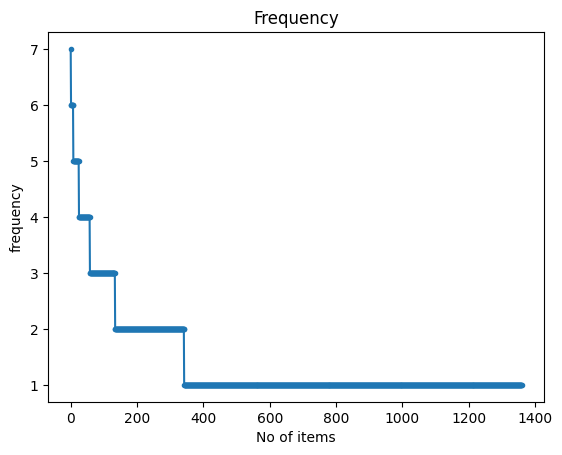

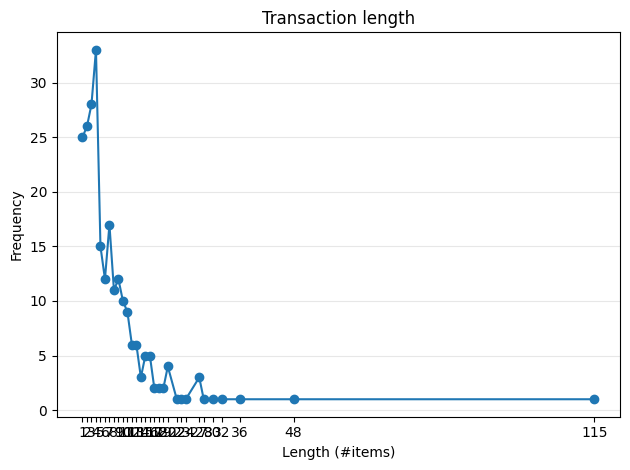

In [48]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('hw_td_freq_db_StockMarket.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 272
Number of items : 2093
Minimum Transaction Size : 1
Average Transaction Size : 12.007352941176471
Maximum Transaction Size : 135
Standard Deviation Transaction Size : 14.4114927195223
Variance in Transaction Sizes : 208.45751031039723
Sparsity : 0.9942630898513252


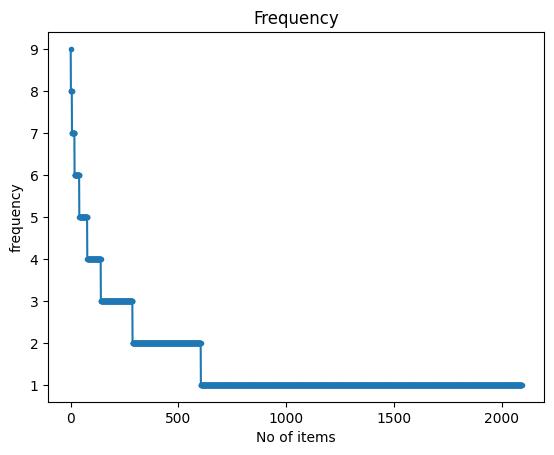

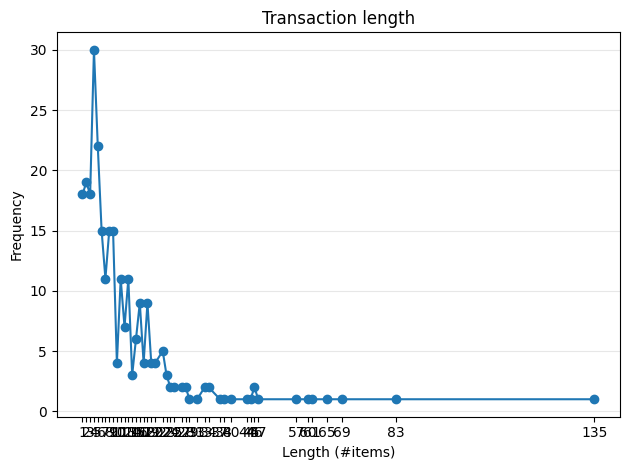

In [49]:
obj = tds.TransactionalDatabase('hw_td_freq_db_stocks.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 146
Number of items : 1390
Minimum Transaction Size : 1
Average Transaction Size : 12.486301369863014
Maximum Transaction Size : 186
Standard Deviation Transaction Size : 23.492125262177403
Variance in Transaction Sizes : 555.6860179499291
Sparsity : 0.9910170493741993


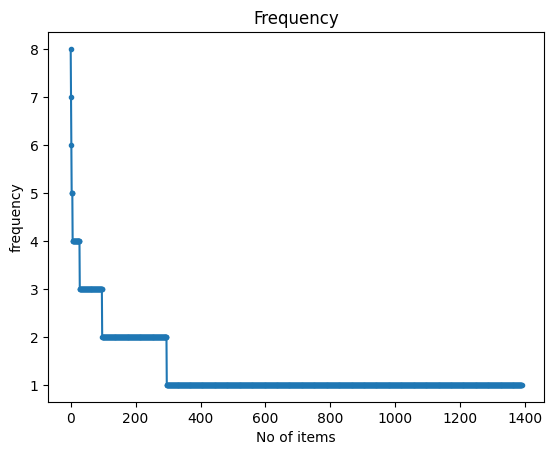

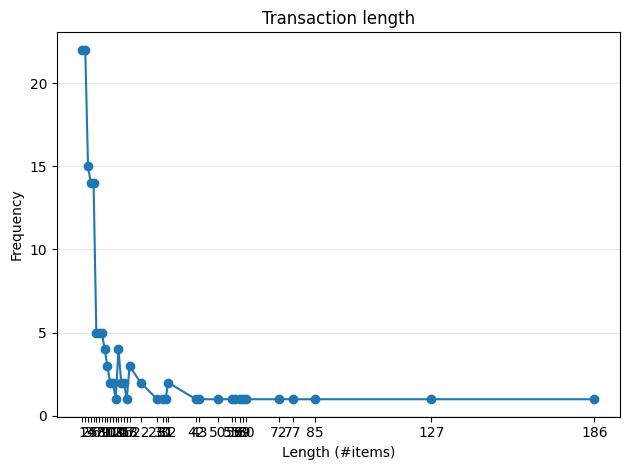

In [50]:
obj = tds.TransactionalDatabase('hw_td_freq_db_stockstobuytoday.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 145
Number of items : 769
Minimum Transaction Size : 1
Average Transaction Size : 6.510344827586207
Maximum Transaction Size : 51
Standard Deviation Transaction Size : 6.905387443378025
Variance in Transaction Sizes : 48.015517241379314
Sparsity : 0.9915340119277163


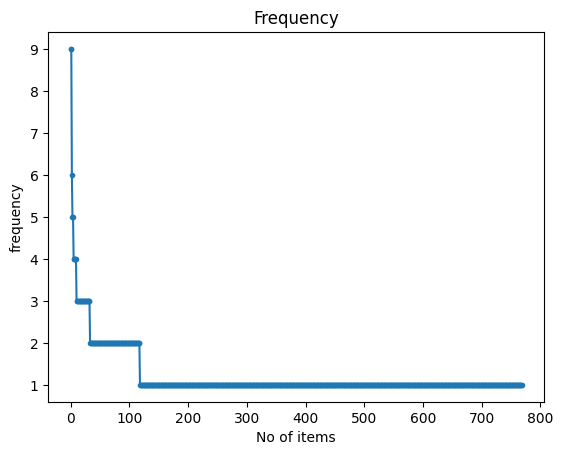

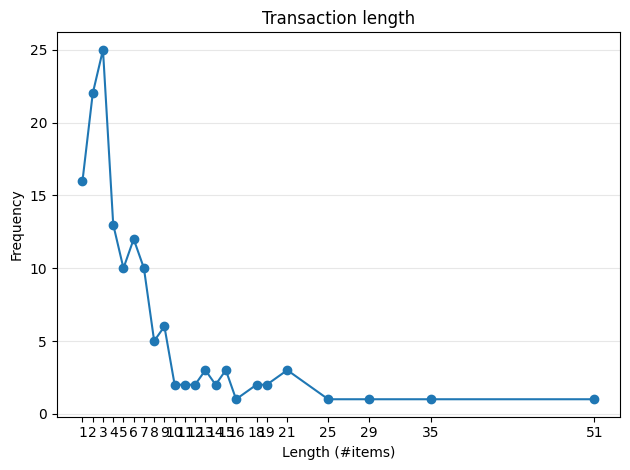

In [51]:
obj = tds.TransactionalDatabase('hw_td_freq_db_wallstreetbets.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

### Frequent Pattern

In [52]:
from PAMI.frequentPattern.basic import FPGrowth as alg
def frequent_patterm_mining_FPGrowth(category_name, minSup=2):

    obj = alg.FPGrowth(iFile=f'hw_td_freq_db_{category_name}.csv', minSup=minSup)
    obj.mine()
    frequentPatterns= obj.getPatternsAsDataFrame()
    print('Total No of patterns: ' + str(len(frequentPatterns))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime())) #measure the runtime
    obj.save(f'freq_patterns_{category_name}_minSup2.txt') #save the patterns
    print(frequentPatterns.head(30))
    return frequentPatterns

In [53]:
minSup = 3
patterns_dfs = []
for cat in categories:
    patterns_dfs.append(frequent_patterm_mining_FPGrowth(cat, minSup=minSup))

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 34
Runtime: 0.0020003318786621094
           Patterns  Support
0           retards        3
1              best        3
2               wsb        3
3               she        3
4           weekend        3
5             found        3
6               spy        3
7           getting        3
8             mango        3
9              life        3
10             read        3
11             bank        3
12           always        3
13            looks        3
14            phone        3
15             lost        3
16             dont        3
17          walmart        3
18  target\twalmart        3
19             goes        3
20            thank        3
21             days        3
22              god        3
23            haven        3
24            worth        4
25          believe        4
26           monday        4
27             lmao        4
28           retard

In [54]:
import pandas as pd

# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in patterns_dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in patterns_dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in patterns_dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
24       puts        9
380    buying        9
23     target        9
375    powell        8
376      very        8
..        ...      ...
32   terrible        3
33      japan        3
34       gets        3
35       rich        3
27     stupid        3

[381 rows x 2 columns]
Number of patterns discarded: 188


In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
df_Reddit_tdm = count_vect.fit_transform(df_Reddit['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
df_Reddit['tokenized_text'] = df_Reddit['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=df_Reddit.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in tqdm(final_pattern_df['Patterns']):
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = df_Reddit['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(df_Reddit_tdm.toarray(), columns=terms, index=df_Reddit.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df    

100%|██████████| 381/381 [00:00<00:00, 2464.23it/s]


00  000  01378  02  027  03  06  08  10  100  ...  mind  crash  law  \
0     0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
1     0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
2     0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
3     0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
4     0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
..   ..  ...    ...  ..  ...  ..  ..  ..  ..  ...  ...   ...    ...  ...   
819   0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
820   0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
821   0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
822   0    0      0   0    0   0   0   0   0    0  ...     0      0    0   
823   0    0      0   0    0   0   0   0   0    0  ...     0      0    0   

     brain  poor  terrible  japan  gets  rich  stupid  
0        0     0         0      0     0     0       0  
1        0     0         0      0     0     0       0  
2        0     0         0      0     0     0       0  
3        0     0         0      0     0     0       0  
4        0     0         0      0     0     0       0  
..     ...   ...       ...    ...   ...   ...     ...  
819      0     0         0      0     0     0       0  
820      0     0         0      0     0     0       0  
821      0     0         0      0     0     0       0  
822      0     0         0      0     0     0       0  
823      0     0         0      0     0     0       0  

[824 rows x 4727 columns]

### 簡易實驗
由於資料集過小，因此我們嘗試`minSups = [2,3,4,5,6,7]`，並且不考慮 FAE Top-K。

In [56]:
from PAMI.frequentPattern.maximal import MaxFPGrowth  as alg
seperator='\t'
minSups =[2,3,4,5,6,7]
MaxFpgrowth_objects = []
for minSup in minSups:
    obj = alg.MaxFPGrowth(iFile='hw_td_freq_db_stocks.csv', minSup=minSup, sep=seperator)
    obj.mine()
    frequentPatterns= obj.getPatternsAsDataFrame()
    print(f'MinSups {minSup} => Total No of patterns: ' + str(len(frequentPatterns))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime()),end = f"\n{'='*20}\n") #measure the runtime
    # print(frequentPatterns)
    MaxFpgrowth_objects.append(obj) #store the object

Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSups 2 => Total No of patterns: 546
Runtime: 0.013975143432617188
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSups 3 => Total No of patterns: 284
Runtime: 0.005997896194458008
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSups 4 => Total No of patterns: 140
Runtime: 0.003998994827270508
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSups 5 => Total No of patterns: 77
Runtime: 0.0030002593994140625
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSups 6 => Total No of patterns: 40
Runtime: 0.0019998550415039062
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
MinSups 7 => Total No of patterns: 17
Runtime: 0.0020012855529785156


In [57]:
from PAMI.frequentPattern.basic import FPGrowth as alg
seperator='\t'
minSups =[2,3,4,5,6,7]
MaxFpgrowth_objects = []
for minSup in minSups:
    obj = alg.FPGrowth(iFile='hw_td_freq_db_stocks.csv', minSup=minSup, sep=seperator)
    obj.mine()
    frequentPatterns= obj.getPatternsAsDataFrame()
    print(f'MinSups {minSup} => Total No of patterns: ' + str(len(frequentPatterns))) #print the total number of patterns
    print('Runtime: ' + str(obj.getRuntime()),end = f"\n{'='*20}\n") #measure the runtime
    # print(frequentPatterns)
    MaxFpgrowth_objects.append(obj) #store the object

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MinSups 2 => Total No of patterns: 1130
Runtime: 0.009927034378051758
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MinSups 3 => Total No of patterns: 290
Runtime: 0.005982637405395508
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MinSups 4 => Total No of patterns: 140
Runtime: 0.003921985626220703
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MinSups 5 => Total No of patterns: 77
Runtime: 0.001987457275390625
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MinSups 6 => Total No of patterns: 40
Runtime: 0.001905679702758789
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
MinSups 7 => Total No of patterns: 18
Runtime: 0.0020020008087158203


當 MinSups 超過 3 以後，兩者 patterns 數量看似差不多，我認為是資料集過小的關係，因此沒有更深度的patterns。

## Dimensionality Reduction

#### TDM

In [58]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)

In [59]:
def plot_3d(ax, X_reduced, title, elev, azim):
    for c, category in zip(col, categories):
        mask = (df_Reddit['subreddit'] == category)
        xs = X_reduced[mask][:, 0]
        ys = X_reduced[mask][:, 1]
        zs = X_reduced[mask][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.5)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')
    ax.legend(loc='upper right')

def show_3d_plots(axes, elev=30, azim=120):
    plot_3d(axes[0], X_pca_tdm, '3D PCA', elev, azim)
    plot_3d(axes[1], X_tsne_tdm, '3D t-SNE', elev, azim)
    plot_3d(axes[2], X_umap_tdm, '3D UMAP', elev, azim)
    plot_3d(axes[3], X_pca_tdm, '3D PCA', elev+30, azim+30)
    plot_3d(axes[4], X_tsne_tdm, '3D t-SNE', elev+30, azim+30)
    plot_3d(axes[5], X_umap_tdm, '3D UMAP', elev+30, azim+30)
    plot_3d(axes[6], X_pca_tdm, '3D PCA', elev+60, azim+60)
    plot_3d(axes[7], X_tsne_tdm, '3D t-SNE', elev+60, azim+60)
    plot_3d(axes[8], X_umap_tdm, '3D UMAP', elev+60, azim+60)
    plt.tight_layout()
    plt.show()


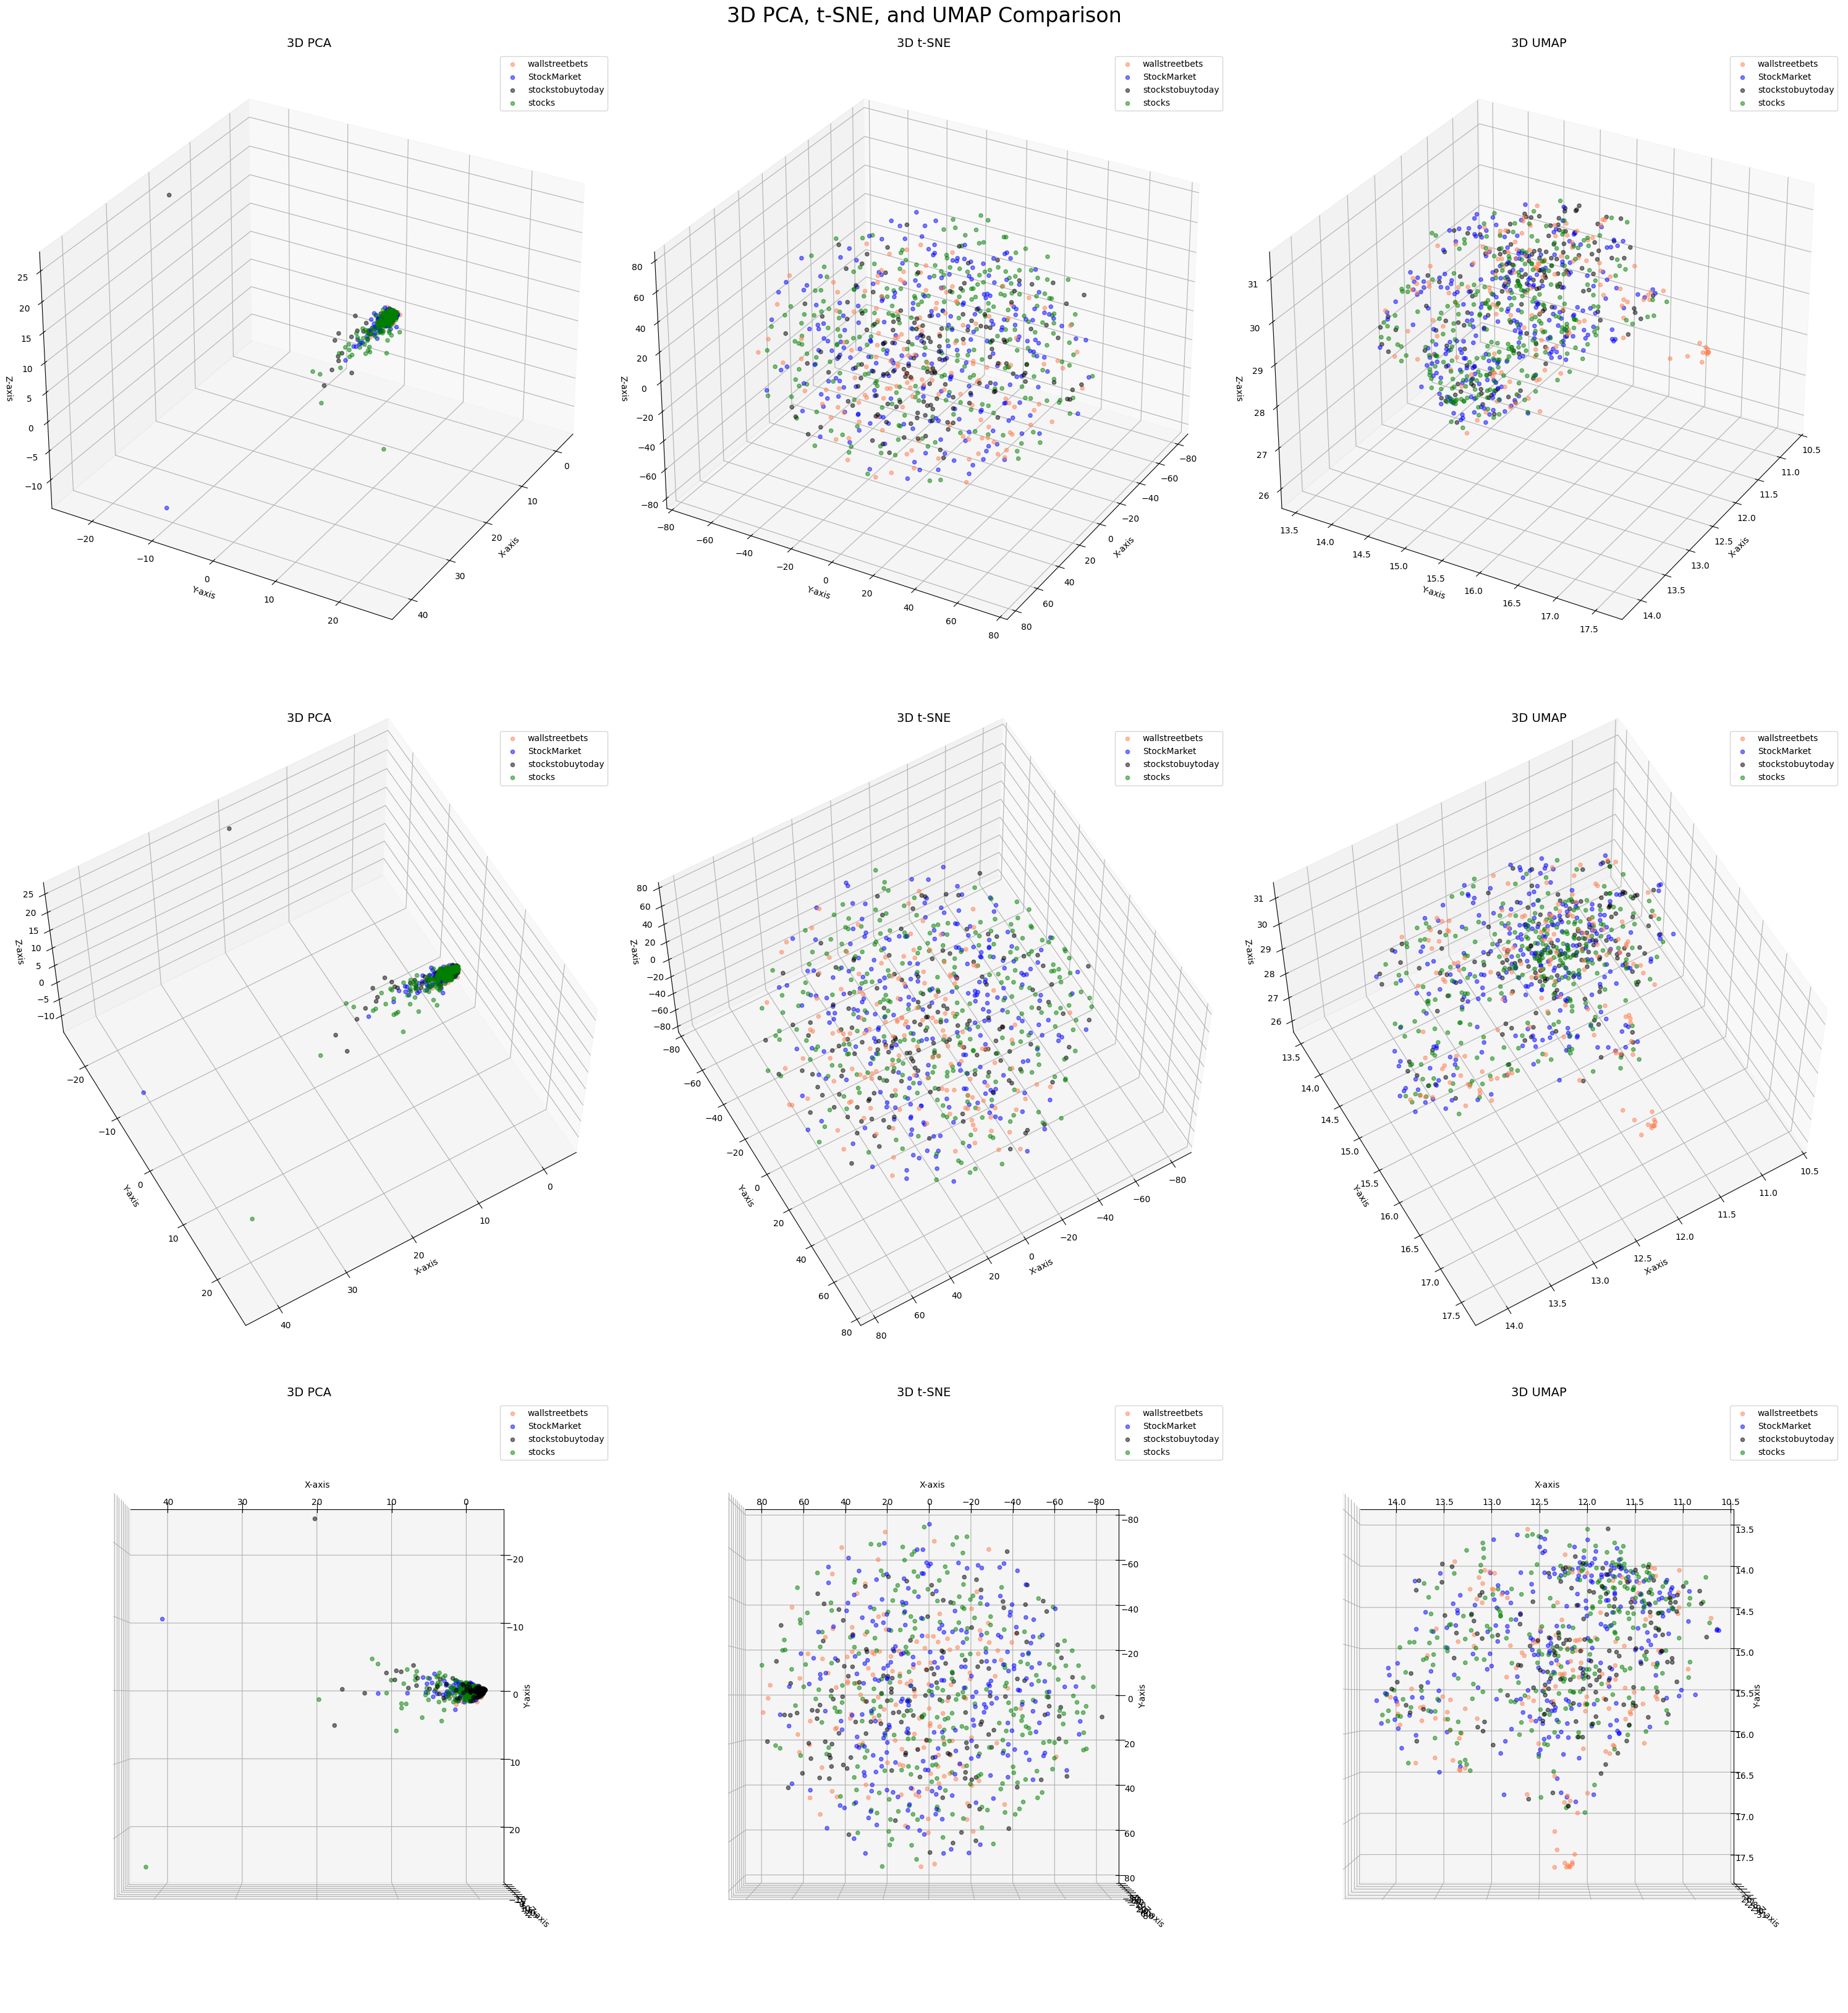

In [60]:
col = ['coral', 'blue', 'black', 'green']
categories = df_Reddit['subreddit'].unique()

fig = plt.figure(figsize=(30, 34))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison', fontsize=24)

axes = [fig.add_subplot(331, projection='3d'),
         fig.add_subplot(332, projection='3d'),
         fig.add_subplot(333, projection='3d'),
         fig.add_subplot(334, projection='3d'),
         fig.add_subplot(335, projection='3d'),
         fig.add_subplot(336, projection='3d'),
         fig.add_subplot(337, projection='3d'),
         fig.add_subplot(338, projection='3d'),
         fig.add_subplot(339, projection='3d')]

show_3d_plots(axes, 30, 30)

#### Augmented

In [61]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

def show_3d_plots_aug(axes, elev=30, azim=120):
    plot_3d(axes[0], X_pca_aug, '3D PCA', elev, azim)
    plot_3d(axes[1], X_tsne_aug, '3D t-SNE', elev, azim)
    plot_3d(axes[2], X_umap_aug, '3D UMAP', elev, azim)
    plot_3d(axes[3], X_pca_aug, '3D PCA', elev+30, azim+30)
    plot_3d(axes[4], X_tsne_aug, '3D t-SNE', elev+30, azim+30)
    plot_3d(axes[5], X_umap_aug, '3D UMAP', elev+30, azim+30)
    plot_3d(axes[6], X_pca_aug, '3D PCA', elev+60, azim+60)
    plot_3d(axes[7], X_tsne_aug, '3D t-SNE', elev+60, azim+60)
    plot_3d(axes[8], X_umap_aug, '3D UMAP', elev+60, azim+60)
    plt.tight_layout()
    plt.show()


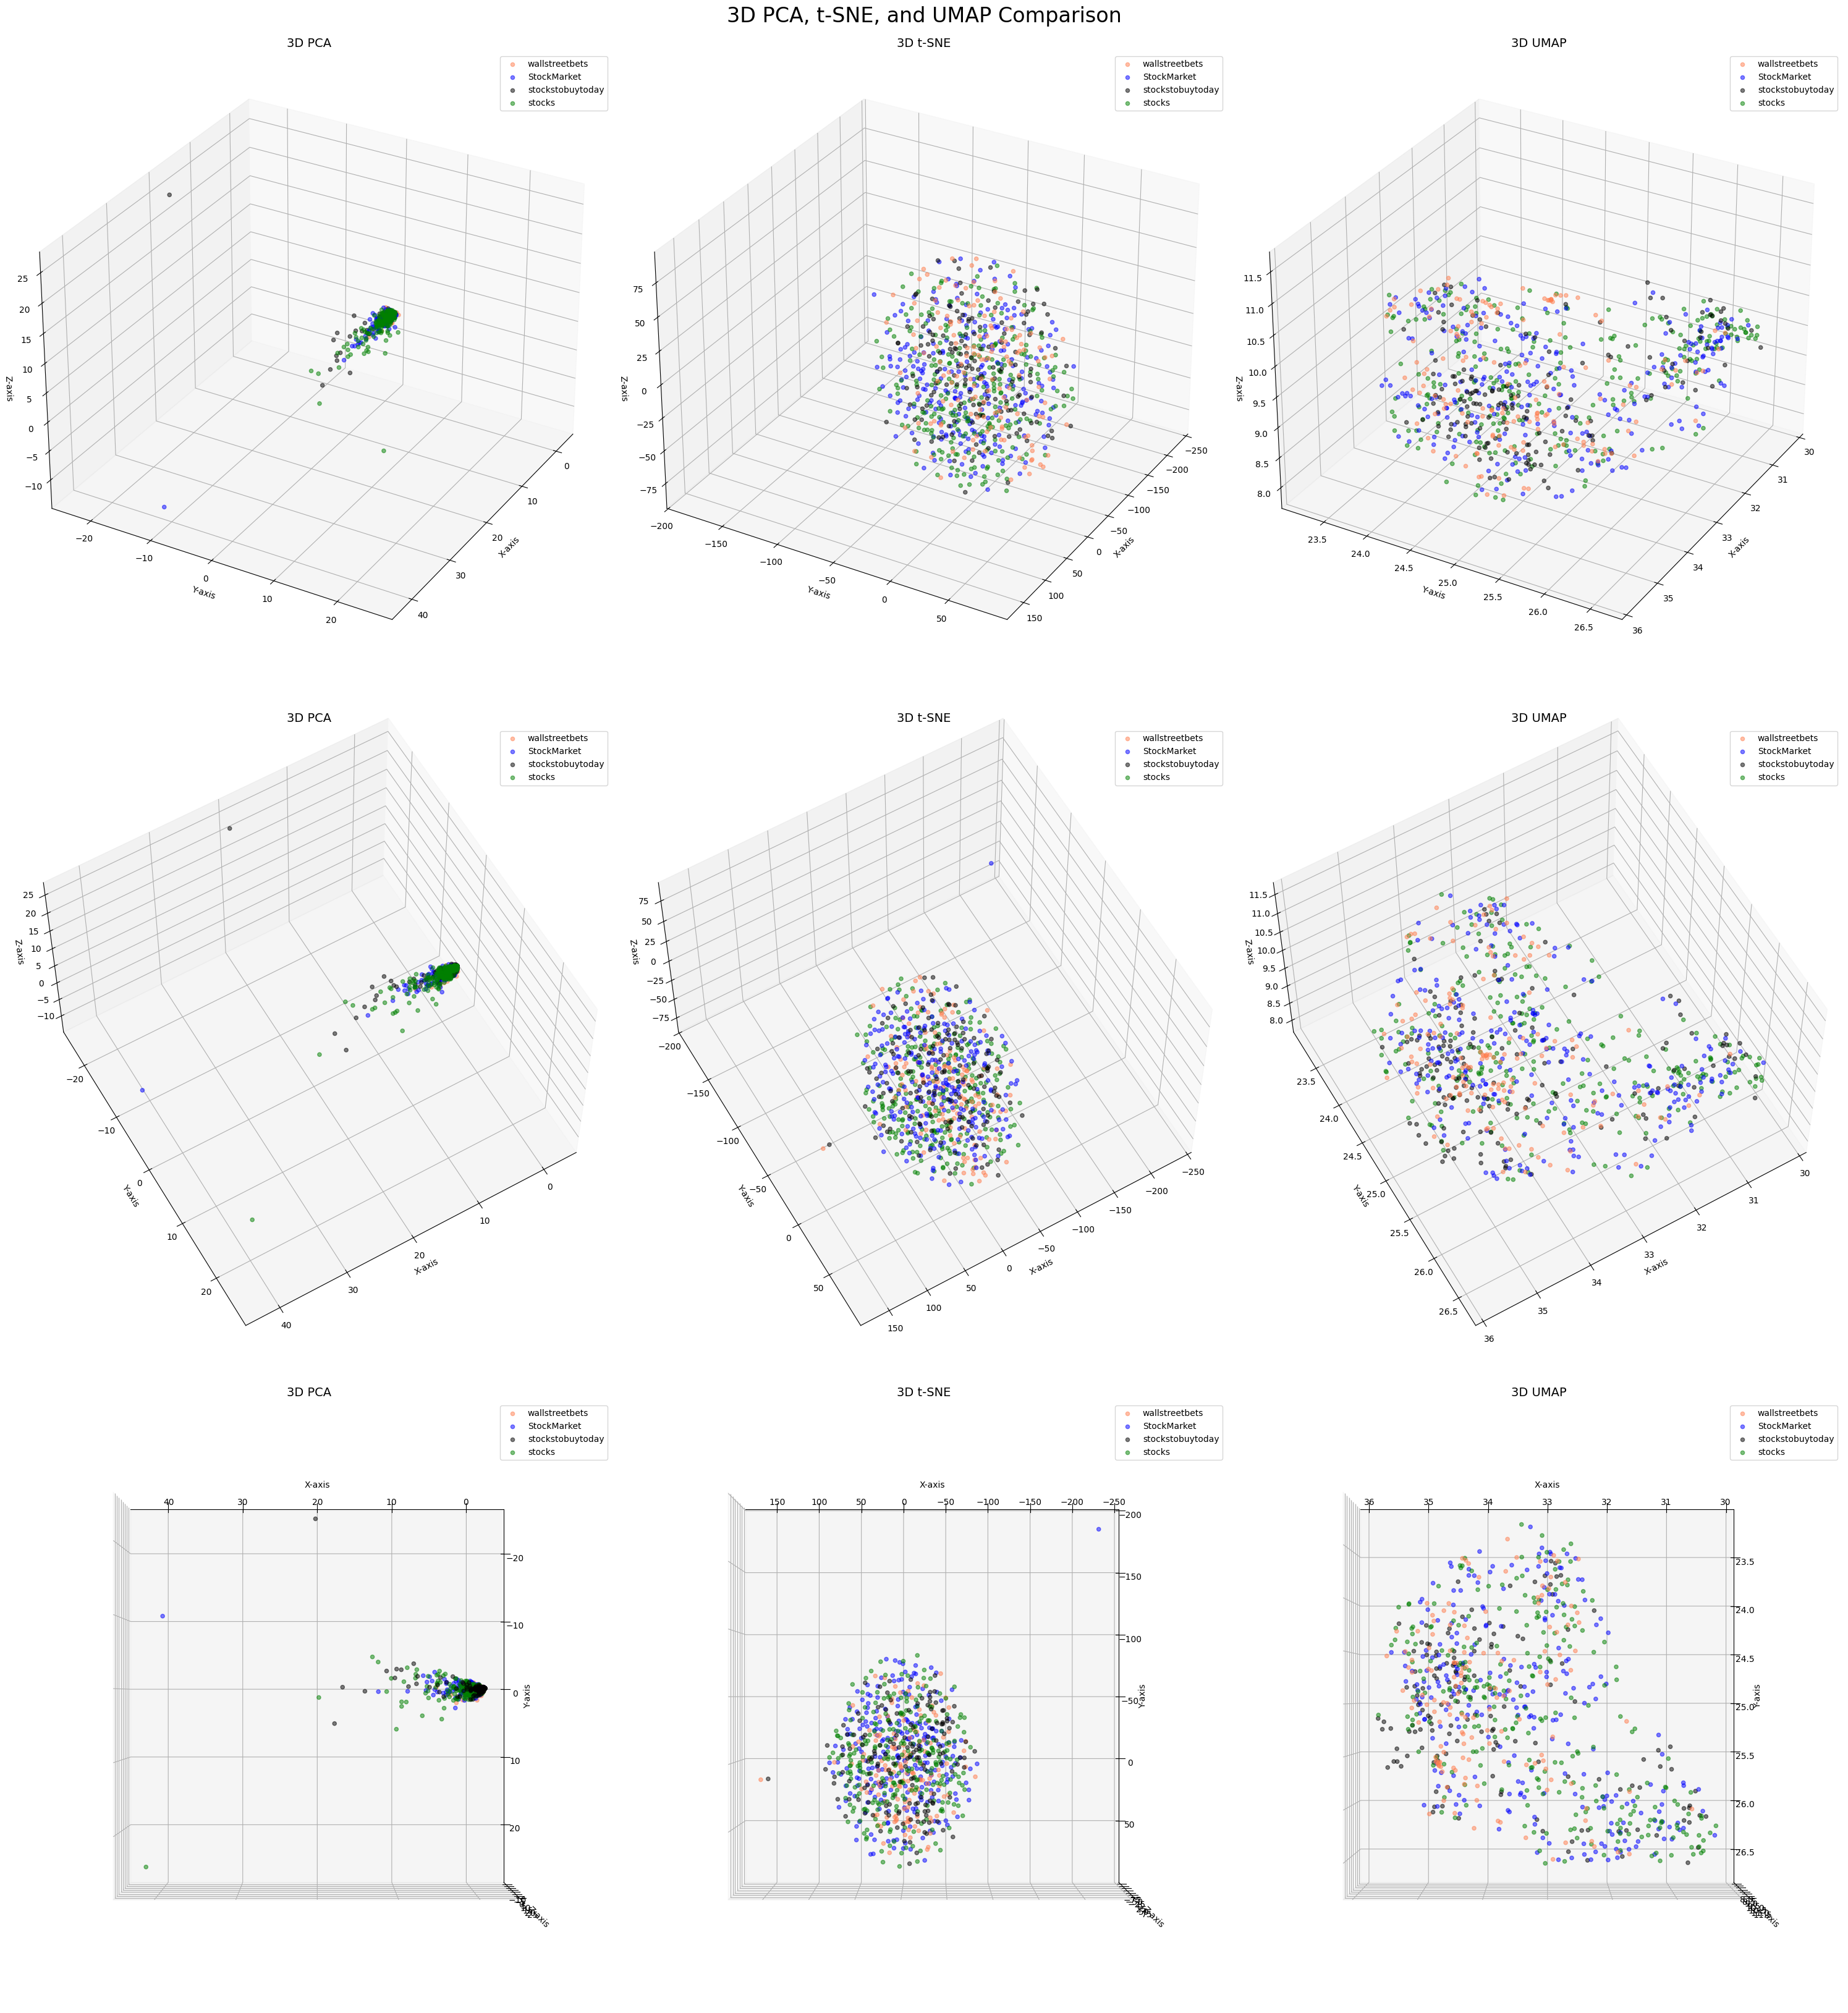

In [62]:
col = ['coral', 'blue', 'black', 'green']
categories = df_Reddit['subreddit'].unique()

fig = plt.figure(figsize=(30, 34))
fig.suptitle('3D PCA, t-SNE, and UMAP Comparison', fontsize=24)

axes = [fig.add_subplot(331, projection='3d'),
         fig.add_subplot(332, projection='3d'),
         fig.add_subplot(333, projection='3d'),
         fig.add_subplot(334, projection='3d'),
         fig.add_subplot(335, projection='3d'),
         fig.add_subplot(336, projection='3d'),
         fig.add_subplot(337, projection='3d'),
         fig.add_subplot(338, projection='3d'),
         fig.add_subplot(339, projection='3d')]

show_3d_plots_aug(axes, 30, 30)

看起來沒有明顯的分群

## Discretization and Binarization

In [63]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df_Reddit['subreddit'])
df_Reddit['bin_subreddit'] = mlb.transform(df_Reddit['subreddit']).tolist()
df_Reddit['bin_subreddit'].head(3)

0    [0, 0, 0, 1]
1    [0, 0, 0, 1]
2    [1, 0, 0, 0]
Name: bin_subreddit, dtype: object

## Data Exploration

In [64]:
df_Reddit.value_counts('subreddit')

subreddit
stocks              273
StockMarket         250
stockstobuytoday    152
wallstreetbets      149
Name: count, dtype: int64

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
def compute_similarity(t1, t2):
    document_to_transform = [t1, t2]
    document_vector_count = count_vect.transform(document_to_transform)
    # document_vector_count_bin = binarize(document_vector_count)
    cos_sim_count = cosine_similarity(document_vector_count[0], document_vector_count[1], dense_output=True).item()
    return cos_sim_count

# 每類抽樣數
n_per_cat = 149

# 依類別抽樣 index
sampled_idx_by_cat = {}
for cat in categories:
    cand = df_Reddit[df_Reddit["subreddit"] == cat]
    take = min(n_per_cat, len(cand))  # 防止樣本不足
    sampled_idx_by_cat[cat] = cand.sample(take, random_state= 810).index.tolist()

# 合併順序
all_idx = sum([sampled_idx_by_cat[cat] for cat in categories], [])
all_labels = df_Reddit.loc[all_idx, "subreddit"].to_numpy()

docs = df_Reddit.loc[all_idx, "text"].to_list()
V = count_vect.transform(docs)  # 稀疏矩陣

# 計算相似度
S = cosine_similarity(V, dense_output=True)

cats = list(pd.unique(all_labels))  # 類別順序
mat = pd.DataFrame(index=cats, columns=cats, dtype=float)

for ci in cats:
    idx_i = np.where(all_labels == ci)[0]
    for cj in cats:
        idx_j = np.where(all_labels == cj)[0]
        block = S[np.ix_(idx_i, idx_j)]
        if ci == cj:
            # 排除自身
            n = block.shape[0]
            tri = np.triu(np.ones((n, n), dtype=bool), k=1)
            vals = block[tri]
            val = np.nanmean(vals) if np.isfinite(vals).any() else np.nan
        else:
            val = np.nanmean(block) if np.isfinite(block).any() else np.nan
        mat.loc[ci, cj] = round(float(val), 4) if np.isfinite(val) else np.nan

display(mat)

wallstreetbets  StockMarket  stockstobuytoday  stocks
wallstreetbets            0.0431       0.0523            0.0430  0.0596
StockMarket               0.0523       0.0768            0.0573  0.0863
stockstobuytoday          0.0430       0.0573            0.0516  0.0669
stocks                    0.0596       0.0863            0.0669  0.0998

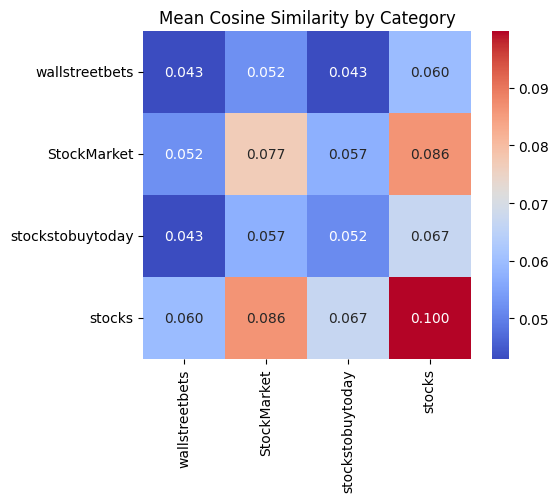

In [66]:
plt.figure(figsize=(6, 5))
sns.heatmap(mat.astype(float), annot=True, fmt=".3f", cmap="coolwarm", square=True)
plt.title("Mean Cosine Similarity by Category")
plt.tight_layout()
plt.show()

與 Master得出一樣的結過：同類別的文字相似度不一定比跨類別高，代表詞袋模型主要反映詞彙重疊，並不能充分表現語意上的關聯。

## Data Classification

In [67]:
df_Reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   type            824 non-null    category      
 1   datetime        824 non-null    datetime64[ns]
 2   post_id         824 non-null    object        
 3   subreddit       824 non-null    category      
 4   title           824 non-null    object        
 5   author          824 non-null    object        
 6   upvotes         824 non-null    int64         
 7   text            824 non-null    object        
 8   subjectivity    824 non-null    float64       
 9   polarity        824 non-null    float64       
 10  entities        824 non-null    object        
 11  sentiment       824 non-null    float64       
 12  unigrams        824 non-null    object        
 13  tokenized_text  824 non-null    object        
 14  bin_subreddit   824 non-null    object        
dtypes: cat

### Naive Bayes classifier

In [68]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Create a mapping from numerical labels to category names
cats = df_Reddit['subreddit'].astype('category').cat.categories
category_mapping = dict(enumerate(cats))

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_Reddit['subreddit'], test_size=0.3, random_state=42)

In [69]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.45564516129032256

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5370    0.3494    0.4234        83
          stocks     0.3544    0.7671    0.4848        73
stockstobuytoday     0.8636    0.4222    0.5672        45
  wallstreetbets     0.6429    0.1915    0.2951        47

        accuracy                         0.4556       248
       macro avg     0.5995    0.4326    0.4426       248
    weighted avg     0.5626    0.4556    0.4432       248



In [70]:
# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_Reddit['subreddit'], test_size=0.3, random_state=42)

In [71]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4798387096774194

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5846    0.4578    0.5135        83
          stocks     0.3630    0.7260    0.4840        73
stockstobuytoday     0.8261    0.4222    0.5588        45
  wallstreetbets     0.6429    0.1915    0.2951        47

        accuracy                         0.4798       248
       macro avg     0.6041    0.4494    0.4629       248
    weighted avg     0.5742    0.4798    0.4717       248



#### $Note$  
#### 當我使用 Minsup = 2 時，Naive Bayes 的準確率反而下降：
![HW_Naive_Bayes_MS2.png](img/HW_Naive_Bayes_MS2.png)
可以看得出 Naive Bayes 抓取到各個類別中 "少數" 的機率組合，因此 precision 在一些類別中可以高達 1.0，但是過低的 recall 會讓整體性能下降許多，由此可知，盲目增加 patterns 特徵不一定會提高最終表現。
#### 當我使用 Minsup = 4 時，Naive Bayes 的準確率也下降：
![HW_Naive_Bayes_MS4.png](img/HW_Naive_Bayes_MS4.png)
所以 Minsup 也不是越大越好，過大會抓到太少的 Pattern 。
### **因此，我最終將 Minsup 設為 3**

### Decision Tree Classifier

In [72]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data (already done above, but shown here for clarity)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, df_Reddit['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (TDM): 0.43951612903225806

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5000    0.4096    0.4503        83
          stocks     0.4286    0.4521    0.4400        73
stockstobuytoday     0.3553    0.6000    0.4463        45
  wallstreetbets     0.5556    0.3191    0.4054        47

        accuracy                         0.4395       248
       macro avg     0.4598    0.4452    0.4355       248
    weighted avg     0.4632    0.4395    0.4380       248



In [73]:
X_train, X_test, y_train, y_test = train_test_split(augmented_df, df_Reddit['subreddit'], test_size=0.3, random_state=42)

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Accuracy (augmented):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=target_names, digits=4))

Decision Tree Accuracy (augmented): 0.43951612903225806

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4627    0.3735    0.4133        83
          stocks     0.3854    0.5068    0.4379        73
stockstobuytoday     0.6154    0.3556    0.4507        45
  wallstreetbets     0.4237    0.5319    0.4717        47

        accuracy                         0.4395       248
       macro avg     0.4718    0.4420    0.4434       248
    weighted avg     0.4603    0.4395    0.4384       248



在這種高維的資料中，決策樹還是無法勝任。

## TF-IDF

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = df_Reddit['text'].tolist()
vectorizer = TfidfVectorizer(stop_words='english',
                             min_df=3,
                             max_df=0.95,)
tfidf = vectorizer.fit_transform(corpus) 
vectorizer.get_feature_names_out()

array(['000', '10', '100', '11', '12', '15', '20', '2025', '22', '25',
       '30', '35', '4271', '50', '500', '5000', '80', '90', 'aapl',
       'able', 'absolutely', 'acquisition', 'actual', 'actually',
       'adding', 'additional', 'adjust', 'administration', 'advice',
       'advisors', 'affect', 'ago', 'agree', 'ai', 'allies', 'allocation',
       'allowed', 'amazon', 'amc', 'america', 'american', 'americans',
       'amzn', 'analysis', 'announced', 'anymore', 'apple', 'appreciated',
       'april', 'aren', 'art', 'article', 'ask', 'asked', 'ass', 'assets',
       'assuming', 'attention', 'avoid', 'away', 'bad', 'bank',
       'bankrupt', 'banned', 'base', 'based', 'basically', 'battery',
       'bear', 'begging', 'believe', 'best', 'bet', 'better', 'biden',
       'big', 'bigger', 'biggest', 'bit', 'bitcoin', 'black', 'blame',
       'bond', 'bonds', 'book', 'bought', 'brain', 'breaking', 'bring',
       'bro', 'build', 'bull', 'bullshit', 'bunch', 'business',
       'businesses

In [75]:
tfidf.toarray().shape

(824, 861)

In [76]:
df_useful_reddit_y = df_Reddit[["subreddit"]].copy()
df_useful_reddit_y["label"] = df_useful_reddit_y["subreddit"].astype('category').cat.codes
mapping_cat = dict(enumerate(df_useful_reddit_y["subreddit"].astype('category').cat.categories))
# Convert the numerical category labels to text labels
target_names = [mapping_cat[label] for label in sorted(mapping_cat.keys())]
target_names

['StockMarket', 'stocks', 'stockstobuytoday', 'wallstreetbets']

In [77]:
df_useful_reddit_X = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())

In [78]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(df_useful_reddit_X,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)

In [79]:
y_train

array([2, 3, 2, 1, 1, 3, 2, 3, 2, 2, 1, 0, 3, 0, 3, 2, 0, 1, 2, 1, 3, 3,
       3, 3, 2, 1, 1, 0, 1, 0, 0, 3, 3, 0, 3, 2, 1, 0, 3, 1, 1, 0, 0, 1,
       3, 1, 1, 0, 3, 1, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1,
       3, 0, 2, 0, 3, 0, 1, 1, 1, 0, 2, 3, 1, 2, 1, 2, 2, 1, 0, 1, 3, 2,
       1, 2, 1, 1, 1, 0, 3, 1, 0, 1, 0, 3, 0, 2, 2, 3, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 3, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2,
       0, 0, 1, 2, 0, 3, 0, 3, 1, 3, 3, 2, 1, 0, 1, 3, 1, 2, 0, 3, 1, 1,
       2, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 3, 3, 0, 3, 2, 2,
       3, 1, 0, 2, 3, 1, 0, 3, 2, 0, 3, 1, 0, 3, 0, 2, 1, 1, 1, 1, 0, 1,
       2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2, 3, 3, 1, 3,
       3, 1, 3, 0, 1, 1, 1, 0, 2, 2, 2, 0, 2, 1, 3, 0, 2, 0, 3, 3, 3, 1,
       1, 1, 0, 3, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 3, 1, 0, 2, 0, 0, 3, 0,
       3, 0, 0, 1, 0, 3, 1, 0, 0, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 3, 2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [80]:
X_train

000   10  100   11        12   15   20  2025   22   25  ...  yeah  year  \
220  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
457  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
329  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
132  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
388  0.0  0.0  0.0  0.0  0.164405  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
..   ...  ...  ...  ...       ...  ...  ...   ...  ...  ...  ...   ...   ...   
71   0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
106  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
270  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
435  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   
102  0.0  0.0  0.0  0.0  0.000000  0.0  0.0   0.0  0.0  0.0  ...   0.0   0.0   

     years  yes  yesterday  yield  yields   yo     young  zero  
220    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
457    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
329    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
132    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
388    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
..     ...  ...        ...    ...     ...  ...       ...   ...  
71     0.0  0.0        0.0    0.0     0.0  0.0  0.227059   0.0  
106    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
270    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
435    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  
102    0.0  0.0        0.0    0.0     0.0  0.0  0.000000   0.0  

[576 rows x 861 columns]

In [81]:
# 只使用 TF-IDF 特徵來訓練和評估 MultinomialNB Naive Bayes 分類器
X_train, X_test, y_train, y_test = train_test_split(df_useful_reddit_X,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)
# Train the Naive Bayes classifier

nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.4717741935483871

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5522    0.4458    0.4933        83
          stocks     0.3621    0.5753    0.4444        73
stockstobuytoday     0.7059    0.5333    0.6076        45
  wallstreetbets     0.4516    0.2979    0.3590        47

        accuracy                         0.4718       248
       macro avg     0.5180    0.4631    0.4761       248
    weighted avg     0.5051    0.4718    0.4742       248



In [82]:
# 只使用 TF-IDF 特徵來訓練和評估 ComplementNB Naive Bayes 分類器
X_train, X_test, y_train, y_test = train_test_split(df_useful_reddit_X,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)
from sklearn.naive_bayes import ComplementNB
# Train the Complement Naive Bayes classifier
cnb_classifier = ComplementNB(alpha=0.3)
cnb_classifier.fit(X_train, y_train)
# Make predictions on the test set
y_pred_cnb = cnb_classifier.predict(X_test)
# Evaluate the classifier
print("ComplementNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_cnb, target_names=target_names, digits=4))


ComplementNB Accuracy: 0.4838709677419355

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.4526    0.5181    0.4831        83
          stocks     0.4714    0.4521    0.4615        73
stockstobuytoday     0.6190    0.5778    0.5977        45
  wallstreetbets     0.4390    0.3830    0.4091        47

        accuracy                         0.4839       248
       macro avg     0.4955    0.4827    0.4879       248
    weighted avg     0.4858    0.4839    0.4835       248



### Concat Pattern Matrix

In [83]:
df_useful_reddit_X.shape

(824, 861)

In [84]:
pattern_matrix.shape

(824, 381)

In [85]:
# Concatenate the original TDM and the pattern matrix to augment the features
tfidf_augmented_df = pd.concat([df_useful_reddit_X, pattern_matrix], axis=1)
tfidf_augmented_df.shape

(824, 1242)

In [86]:
# 使用 pattern matrix 與 TF-IDF 結合後的資料進行 Multinomial Naive Bayes 分類
X_train, X_test, y_train, y_test = train_test_split(tfidf_augmented_df,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5403225806451613

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.6812    0.5663    0.6184        83
          stocks     0.4495    0.6712    0.5385        73
stockstobuytoday     0.6216    0.5111    0.5610        45
  wallstreetbets     0.4545    0.3191    0.3750        47

        accuracy                         0.5403       248
       macro avg     0.5517    0.5169    0.5232       248
    weighted avg     0.5592    0.5403    0.5383       248



In [87]:
# 使用 pattern matrix 與 TF-IDF 結合後的資料進行 Complement Naive Bayes 分類
from sklearn.naive_bayes import ComplementNB
X_train, X_test, y_train, y_test = train_test_split(tfidf_augmented_df,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)
# Train the Naive Bayes classifier
nb_classifier = ComplementNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5362903225806451

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5233    0.5422    0.5325        83
          stocks     0.5542    0.6301    0.5897        73
stockstobuytoday     0.5909    0.5778    0.5843        45
  wallstreetbets     0.4571    0.3404    0.3902        47

        accuracy                         0.5363       248
       macro avg     0.5314    0.5226    0.5242       248
    weighted avg     0.5321    0.5363    0.5318       248



In [88]:
# Concatenate the original TDM and the pattern matrix to augment the features
tfidf_tdm_augmented_df = pd.concat([df_useful_reddit_X, pattern_matrix, tdm_df], axis=1)
tfidf_tdm_augmented_df.shape

(824, 5588)

In [89]:
# 使用 TDM 、 pattern matrix 與 TF-IDF 結合後的資料進行 Multinomial Naive Bayes 分類
X_train, X_test, y_train, y_test = train_test_split(tfidf_tdm_augmented_df,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5282258064516129

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5542    0.5542    0.5542        83
          stocks     0.4321    0.4795    0.4545        73
stockstobuytoday     0.7105    0.6000    0.6506        45
  wallstreetbets     0.5000    0.4894    0.4946        47

        accuracy                         0.5282       248
       macro avg     0.5492    0.5308    0.5385       248
    weighted avg     0.5364    0.5282    0.5311       248



In [90]:
# 使用 TDM 、 pattern matrix 與 TF-IDF 結合後的資料進行 Multinomial Naive Bayes 分類
X_train, X_test, y_train, y_test = train_test_split(tfidf_tdm_augmented_df,
                                                    df_useful_reddit_y['label'].values,
                                                    test_size=0.3,
                                                    random_state=42)
# Train the Naive Bayes classifier
nb_classifier = ComplementNB(alpha=0.9)
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

Accuracy: 0.5645161290322581

Classification Report:
                   precision    recall  f1-score   support

     StockMarket     0.5921    0.5422    0.5660        83
          stocks     0.4653    0.6438    0.5402        73
stockstobuytoday     0.7647    0.5778    0.6582        45
  wallstreetbets     0.5946    0.4681    0.5238        47

        accuracy                         0.5645       248
       macro avg     0.6042    0.5580    0.5721       248
    weighted avg     0.5866    0.5645    0.5672       248



### Classification Discussion

Naive Bayes 都有試不同的 alpha ， 只取表現最佳（同分並列以 T 標記）

| Using data | Classifier | Accuracy | F1 | rank(acc) | rank(f1) |
| --- | --- | --- | --- | --- | --- |
| TDM | MultinomialNB | 0.4556 | 0.4426 | 8 | 9 |
| TDM | DecisionTree | 0.4395 | 0.4355 | 9(T) | 10 |
| TDM + Pattern Matrix | MultinomialNB | 0.4798 | 0.4629 | 6 | 7 |
| TDM + Pattern Matrix | DecisionTree | 0.4395 | 0.4434 | 9(T) | 8 |
| TF-IDF | MultinomialNB | 0.4718 | 0.4761 | 7 | 6 |
| TF-IDF | ComplementNB | 0.4839 | 0.4879  | 5 | 5 |
| TF-IDF + Pattern Matrix | MultinomialNB | 0.5403 | 0.5232 | 2 | 4 |
| TF-IDF + Pattern Matrix | ComplementNB | 0.5363 | 0.5242 | 3 | 3 |
| TDM + TF-IDF + Pattern Matrix | MultinomialNB | 0.5282 | 0.5385 | 4 | 2 |
| TDM + TF-IDF + Pattern Matrix | ComplementNB | 0.5645 | 0.5721 | 1 | 1 |

- 以 accuracy 的分數來看，可以發現 TDM + TF-IDF + Pattern Matrix + ComplementNB 的表現最佳，其次是 TF-IDF + Pattern Matrix + MultinomialNB。
- TF-IDF 整體優於純 TDM (同模型下 Acc 與 F1 都略高) ，推測是因為 TF-IDF 降低全域高頻詞權重而凸顯關鍵詞。
- 加上 Pattern Matrix 後，兩種 NB 都顯著提升，應該是 pattern 提供了更具語境的可分辨特徵。
- 在 TA 提供的資料中有提到，ComplementNB 更適合使用在長尾資料，因為在長尾詞彙、類別不平衡與偏斜分布情境下，ComplementNB 對負例補償更穩定。
- 決策樹在高維度的資料中非常不適合，因此在此資料集中表現頗差。



## Fourth
 In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well.
 1. What are those inefficent parts you noticed?
 2. How can you improve the Data preprocessing for these specific datasets? 


### What are those inefficent parts you noticed?

1. Sampling：練習的兩個資料集都屬於小資料，因此使用Sampling成效有限。
2. 將 Word Frequency Distribution 視覺化：我認為詞頻看表格反而效率更高，並且可以直接使用切片切出想看的地方(除了排序後的詞頻，可以看他的長尾分布狀態)
3. TransactionalDatabase的分布圖：助教的解釋是，要透過這些圖片找出適合的minsup，但我認為在後面直接寫一個實驗程式與簡單的分類器，以驗證集 F1/Acc 作為挑選準則，就可以在小資料集(<1GB)中快速找到好的minsup。 
4. 儲存TransactionalDatabase與patterns txt：因為資料集太小，直接算不會影響太多時間。
5. 一個類別的 FPGrowth 寫一個 cell：以迴圈封裝會更好，我在homework有改進。
6. LabelBinarizer ： 這兩個資料集都不需要做 one-hot encoding，這一步過於多餘。
7. 針對兩篇文章做cosine_similarity：整體cosine similarity matrix 或群間平均距離，反而比單篇比較更有類別解釋力。


### How can you improve the Data preprocessing for these specific datasets? 
我覺得這個問題有點發散，因為前面只提到`Each dataset can be handled differently as well` ，而 `these specific datasets` 我無法精確抓到對應語意，我就假設這是在問 Master 與 Homework 中使用的兩個 "tsxt mining" 資料集：
1. 在 Master 中使用的 fetch_20newsgroups 與 Homework 中使用的 Reddit-stock-sentiment 都屬於小資料集，但不一樣的是Reddit-stock-sentiment 是社群網路中的貼文與留言組成，因此有許多零散句型與圖示代號，[若任務與情緒相關，可保留 emoji 為 token，因為有研究指出emoji等圖示更能表達情緒](https://ccc.technews.tw/2021/03/13/emoji-you-do-not-know/)，否則以規則移除以降低雜訊。
2. 我已經修過NLP的課程，所以對NLP處理有一定的了解，在常見的處理過程中會有 lemmatization(詞型還原) ，但在 LAB1 中我們並沒有實作，我認為可以嘗試加入此步驟更可以減少語意扭曲。
3. Pattern Matrix 可以再加入 n-gram features ，強化上下文與語法關係。  


最終目標是讓特徵更乾淨、語意更強、分布更均衡。